## Importing necessary functions


In [1]:
#from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
#import sys
#!{sys.executable} -m pip install seaborn

In [3]:
import random,os,glob
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.random import set_random_seed
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#set_random_seed(0)
#np.random.seed(0)

c:\users\administrator.aapna-dsk-025\appdata\local\programs\python\virtualmachines\oldenv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\administrator.aapna-dsk-025\appdata\local\programs\python\virtualmachines\oldenv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\administrator.aapna-dsk-025\appdata\local\programs\python\virtualmachines\oldenv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be und

## Load Data Drive

In [5]:
#import logging
#logger = tf.get_logger()
#logger.setLevel(logging.ERROR)

In [6]:
#NH_path = './dataset/0'
#NH = glob.glob(os.path.join(dir_path, '*.jpg'))
#H_path = './dataset/1'
#H = glob.glob(os.path.join(dir_path, '*.jpg'))

In [7]:
#len(NH)

In [8]:
#print(H)

## Split Data

## Generate Data


## Data Augmentation


In [9]:
path = "./dataset"

In [10]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
        rescale = 1./255
)
test_datagen = ImageDataGenerator(
        rescale = 1./255
)

In [11]:
img_shape = (224, 224, 3) # default values

train_batch_size = 32
val_batch_size = 4

train_generator = train_datagen.flow_from_directory(
            path + '/train', # directory or dataframe =
            target_size = (img_shape[0], img_shape[1]),
            batch_size = train_batch_size,
            class_mode = 'categorical',
            shuffle = False) #binary

validation_generator = validation_datagen.flow_from_directory(
            path + '/valid',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = val_batch_size,
            class_mode = 'categorical',
            color_mode="rgb",
            shuffle = False)

test_generator = test_datagen.flow_from_directory(
            path + '/test',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = 2,
            class_mode = 'categorical',
            color_mode="rgb",
            shuffle = False)

Found 400 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [12]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)



{'Not_PavBhaji': 0, 'PavBhaji': 1}


In [13]:
for k,v in train_generator.class_indices.items():
    label = {v:str(k)}
print(label)

{1: 'PavBhaji'}


In [14]:
label={0:'Not_PavBhaji', 1:'PavBhaji'}

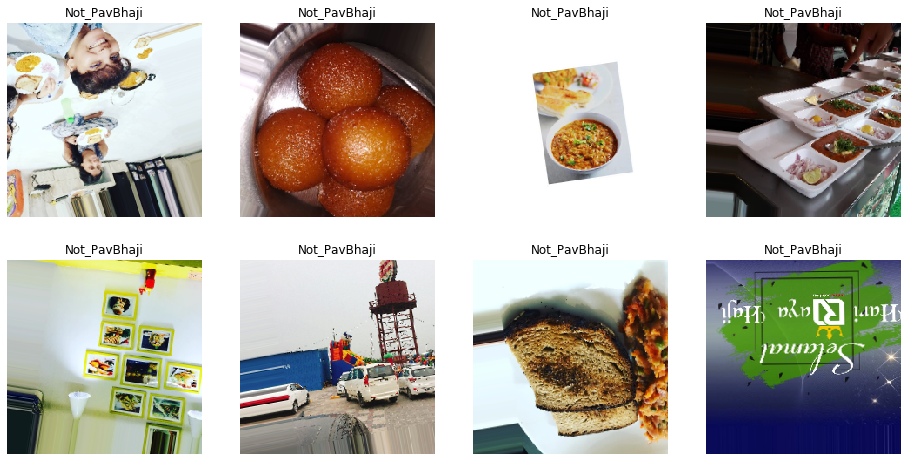

In [15]:

t_x, t_y = next(train_generator)
#print(t_y)
#if t_y == 
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (tc_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_x = np.clip((tc_x-tc_x.min())/(tc_x.max()-tc_x.min())*255, 0 , 255).astype(np.uint8)[:,:,::]
    c_ax.imshow(c_x[:,:])
    c_ax.set_title('%s' % label[np.argmax(c_y)])
    c_ax.axis('off')

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization

import time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=img_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

start = time.time()

model.summary()
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('Inception.h5', monitor='val_acc', save_best_only=True)

steps_per_epoch = train_generator.samples//train_generator.batch_size
validation_steps = validation_generator.samples//validation_generator.batch_size

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch ,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=0,
    callbacks = [es, mc])
# Set callback functions to early stop training and save the best model so far
#callbacks = [EarlyStopping(monitor='val_loss', patience=3),
#             ModelCheckpoint(filepath='model.h5', monitor='val_acc', save_best_only=True)]

#history = model.fit(X_train, y_train,
 #                     batch_size=32,
  #                    epochs=100, 
   #                   callbacks=callbacks,
    #                  verbose=0,
     #                 validation_data=(X_test, y_test))

end = time.time()
print('Execution time: ', end-start)

## Visualize Data samples

## Pre trained model

In [16]:
from tensorflow.keras.applications import InceptionV3
#from tensorflow.keras.applications import VGG16

inception = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape = img_shape)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# Freeze the layers except the last 3 layers
for layer in inception.layers[:-3]:
    layer.trainable = False

## Our model 
Do changes

In [18]:
# Create the model
model = Sequential()

# Add the convolutional base model
model.add(inception)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
# last layer
model.add(Dense(2, activation='softmax')) #relu

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              52429824  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 74,234,658
Trainable params: 52,431,874
Non-trainable params: 21,802,784
_________________________________________________________________


### Train the model

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [21]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('Inception.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

steps_per_epoch = train_generator.samples//train_generator.batch_size
validation_steps = validation_generator.samples//validation_generator.batch_size

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch ,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=0,
    callbacks = [es, mc])

Instructions for updating:
Use tf.cast instead.
10/10 [==============================] - 5s 505ms/step - loss: 1.4764 - acc: 0.4250

Epoch 00001: val_acc improved from -inf to 0.42500, saving model to Inception.h5
10/10 [==============================] - 4s 376ms/step - loss: 2.1754 - acc: 0.5000

Epoch 00002: val_acc improved from 0.42500 to 0.50000, saving model to Inception.h5
10/10 [==============================] - 4s 391ms/step - loss: 3.2492 - acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
10/10 [==============================] - 4s 386ms/step - loss: 1.0253 - acc: 0.2750

Epoch 00004: val_acc did not improve from 0.50000
10/10 [==============================] - 4s 395ms/step - loss: 1.8995 - acc: 0.5000

Epoch 00005: val_acc did not improve from 0.50000
10/10 [==============================] - 4s 376ms/step - loss: 1.1196 - acc: 0.4250

Epoch 00006: val_acc did not improve from 0.50000
10/10 [==============================] - 4s 383ms/step - loss: 1.2827 - acc: 

KeyboardInterrupt: 

### Training history

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Prediction on Test Set

In [ ]:
test_steps = test_generator.samples//test_generator.batch_size
test_generator.reset()
pred = model.predict_generator(test_generator,
                                steps = test_steps,
                                verbose=1)

In [ ]:
# Visualize samples

### Confusion Matrix

### Sklearn classification metrics

In [ ]:
# fine tuning

In [ ]:
# saving model